# Matplotlib Lecture Note
___

- The most popular plotting library for Python
- Gives control over every aspect of figure
- Designed to have a similar feel to MATLAB
- Works well with data-processing library such as numpy, pandas, or seaborn

See [matplotlib homepage](https://matplotlib.org/index.html) for more detailed information and documentation.
<br><br>
Recommended tutorial page by Nicolas P. Rougier:
https://github.com/rougier/matplotlib-tutorial
___

*My personal note:*

Since I'm a MATLAB user, this lecture is of very familiar to me, so this would be my own review for using matlab-ish library with Python, i.e. *matplotlib*

___
## PART 1

This part covers:

1. Basic *matplotlib* command (generate data with numpy)
2. Functional Plot Method
3. Object-Oriented Method
4. [Extra] Combining pandas and matplotlib to extract and plot the data
___

In [1]:
import matplotlib.pyplot as plt

If you use jupyter kernel system (like this one), use the following line to see the plot you create inside jupyter notebook:

In [2]:
%matplotlib inline

For other IDE, simply use `plt.show()` to show the plot.

In [3]:
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Basic Matplotlib command allows you to very quickly create a plot. Two ways of matplotlib plotting:
1. Functional Method
2. Object-Oriented Method (usually the better way to plot)
___

### 1.1. Functional Plot Method

- The most basic way to plot in matplotlib: `plt.plot(x,y)`
- Additional arguments are based on MATLAB style. So if you're familiar with MATLAB, this shouldn't be a problem for you.

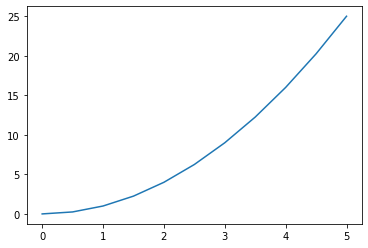

In [6]:
plt.plot(x,y)
plt.show()

Text(0.5, 1.0, 'Judul Title')

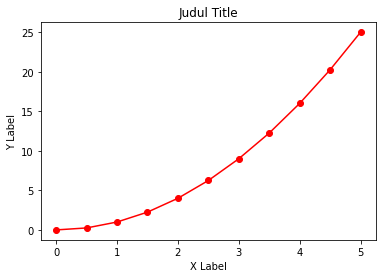

In [21]:
plt.plot(x,y,'or-')

plt.xlabel('X Label')
plt.ylabel('Y Label')

plt.title('Judul Title')

Later on we'll learn on how to specify DPI of the plot, so that we have a finer clarity of graphic.

#### Multiplot (Subplot)

Creating multiple plot in the same canvas. **subplot()** method is more functional in general.

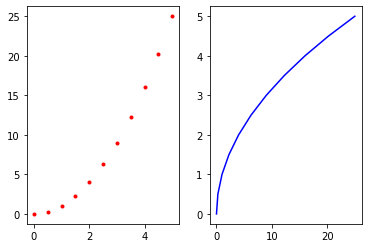

In [22]:
plt.subplot(1,2,1)
plt.plot(x,y,'r.')

plt.subplot(1,2,2)
plt.plot(y,x,'b')

___
### 1.2. Object-Oriented API Method

- A better way to plot data with matplotlib
- Instantiate figure objects and call methods or attributes from that object
- In other words, we have more control over the figure properties

#### 1.2.1. Single Plot

Text(0.5, 1.0, 'Title Here!')

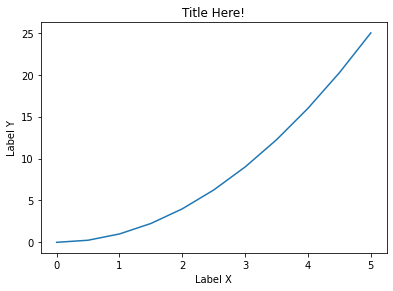

In [26]:
# Add an imaginary blank canvas
fig = plt.figure()

# Add an axes to it. Pass a list of position [left,bottom,width,height] of the axes relative to the canvas.
axes = fig.add_axes([0.1,0.1,0.8,0.8])

# Plot data into the axes
axes.plot(x,y)
axes.set_xlabel('Label X')
axes.set_ylabel('Label Y')
axes.set_title('Title Here!')

#### 1.2.2. Multiplot

Text(0.5, 1.0, 'Smaller Plot')

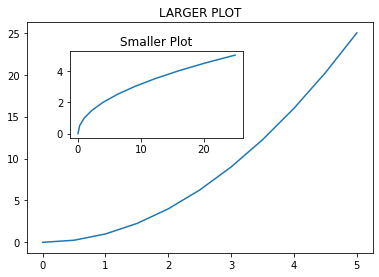

In [48]:
# Create a figure object
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y)
axes1.set_title('LARGER PLOT')

axes2.plot(y,x)
axes2.set_title('Smaller Plot')

___
### 1.3. [EXTRA - Self Try] Using Pandas to Read Data and Plot Them with Matplotlib

- Datafile is taken from my real research data obtained from Fortran-based simulation code, written in ASCII neutral format
- File is already converted to txt format, separated with tab/space denoted as '\t'

In [7]:
import pandas as pd

In [8]:
df = pd.read_table('samples/data-anggi.txt',sep='\t')

In [9]:
df.head()

,Nstp,TIME,AvrPFI_D,VarPFI_D,Dfs(m*m/s),Dflow(m/s),AvrPFI_E,VarPfi_E,Kai(m*m/s),Eflow(m./s)
0,1,0.000237,-1.03,0.000013,0.00000,0.0,-1.03,0.000013,0.00000,0.0
1,2,0.000261,-1.02,0.000010,-0.01500,39.0,-1.02,0.000010,-0.01500,39.0
2,3,0.000285,-1.02,0.000014,0.00420,33.9,-1.02,0.000014,0.00421,33.9
3,4,0.000308,-1.02,0.000020,0.01410,33.2,-1.02,0.000020,0.01410,33.2
4,5,0.000332,-1.02,0.000014,0.00651,16.2,-1.02,0.000014,0.00651,16.1


In [10]:
t = df['TIME'].values
dfs = df['Dfs(m*m/s)'].values
pfi = df['VarPFI_D'].values

Text(0, 0.5, '$P_\\phi$ ($m^2/s$)')

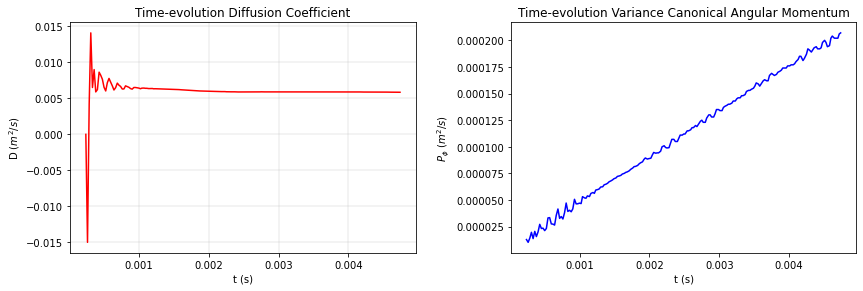

In [79]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])

axes1.plot(t,dfs,'r')
axes1.set_title('Time-evolution Diffusion Coefficient')
axes1.set_xlabel('t (s)')
axes1.set_ylabel('D ($m^2/s$)')
axes1.grid(True,linewidth=0.3)

axes2 = fig.add_axes([1.12,0.1,0.8,0.8])

axes2.plot(t,pfi,'b')
axes2.set_title('Time-evolution Variance Canonical Angular Momentum')
axes2.set_xlabel('t (s)')
axes2.set_ylabel('$P_\phi$ ($m^2/s$)')

___
## PART 2

Covered in this part are:

1. Object-Oriented API Method (cont'd)
2. Figure Size and DPI Control
3. Saving Figure
4. Figure Properties (e.g. Plot Legend)
___

### 2.1. Object-Oriented API Method (cont'd)

- Directly create subplots using `fig,axes = plt.subplots()` using a range of row numbers `nrows` and column numbers `ncols`
- Use tupple on the variable packing instead of using `fig = plt.figure()`
- `axes` contains a list of each subplot

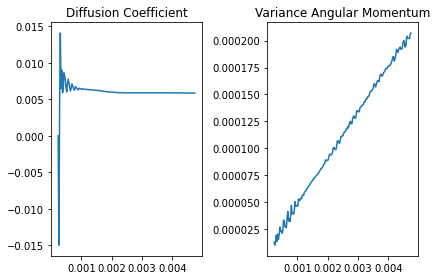

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2)

# for current_ax in axes:
#     current_ax.plot(t,dfs)
    
axes[0].plot(t,dfs)
axes[0].set_title("Diffusion Coefficient")

axes[1].plot(t,pfi)
axes[1].set_title("Variance Angular Momentum")

plt.tight_layout()

`plt.tight_layout()` fixes the overlapping figure issue

In [24]:
axes

array([<AxesSubplot:title={'center':'Diffusion Coefficient'}>,
       <AxesSubplot:title={'center':'Variance Angular Momentum'}>],
      dtype=object)

___
### 2.2. Figure Size and DPI Control

- Function: `plt.figure(figsize=(width,height),dpi=int)`
- `figsize` is passed with tupple using inch unit by default
- `dpi` is integer value (pixel per inch / dot per inch)

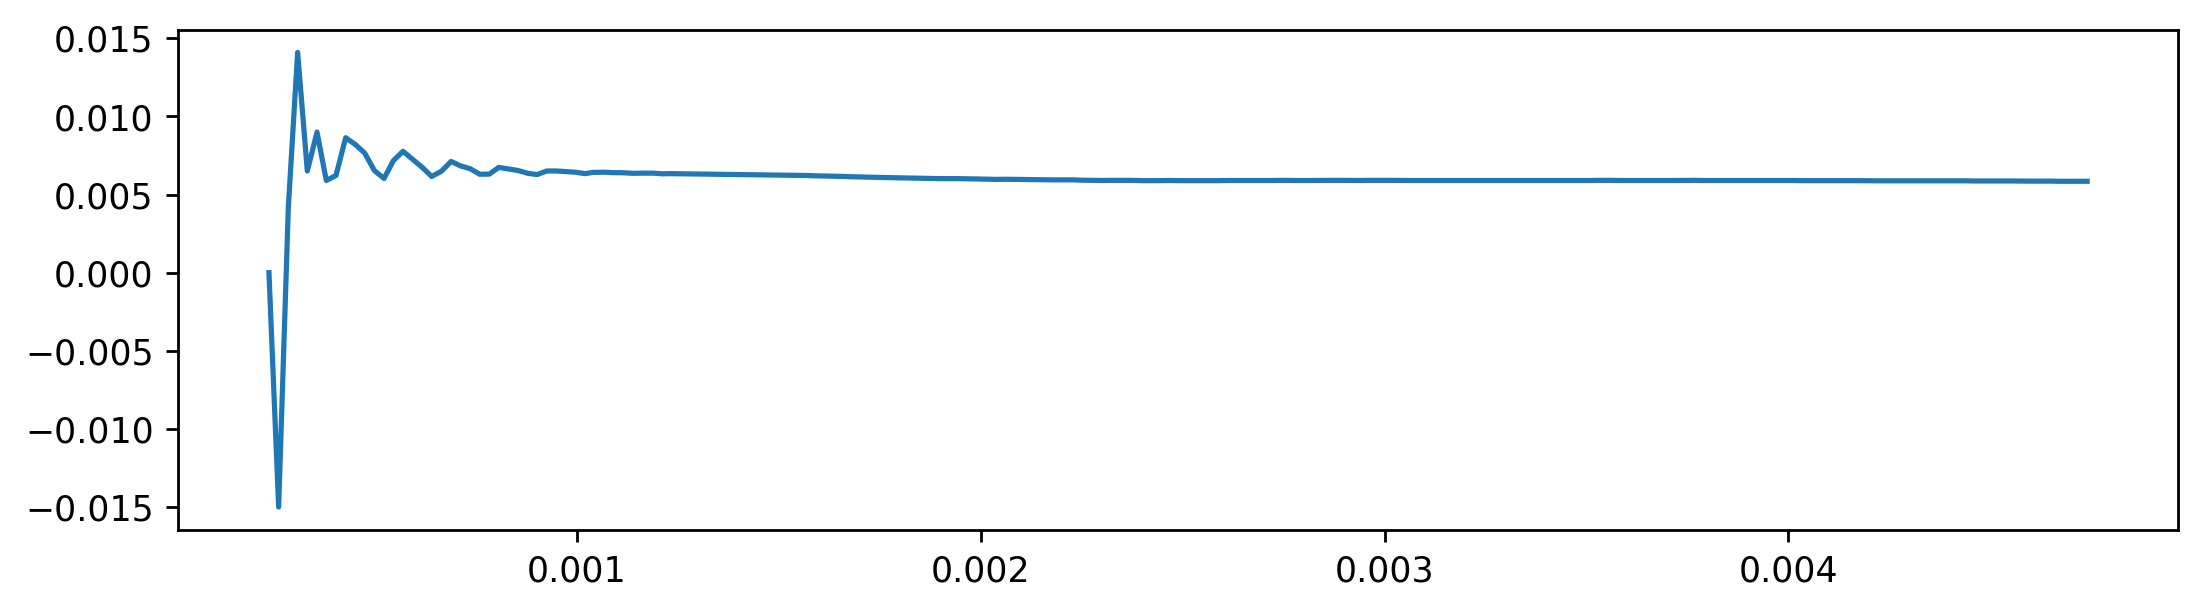

In [29]:
fig = plt.figure(figsize=(8,2),dpi=250)

ax = fig.add_axes([0,0,1,1])
ax.plot(t,dfs)

**You can also use it in subplot()**

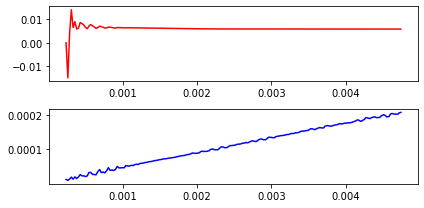

In [36]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(6,3))

axes[0].plot(t,dfs,'r')

axes[1].plot(t,pfi,'b')

plt.tight_layout()

___
### 2.3. Saving a Figure

Just as in MATLAB, you can save the figure in various high-quality formats such as jpg, png, eps, svg, pdf, etc.

In [37]:
# For example, save as png
fig.savefig('my_figure.png',dpi=200)

___
### 2.4. Figure Properties Handler

#### 2.4.1. Legend

- Pass `label` argument in the plotted axes, then add `ax.legend()` to show the legend box based on the `label` that has been set up on each plot call(s).
- `ax.legend()` has some property arguments you can use. For example, `loc` sets the location of legend box (0 = best location).
- `loc` can also be passed with a tupple (x,y) axes of the lower left of the legend
- See [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) for details of other available parameters.

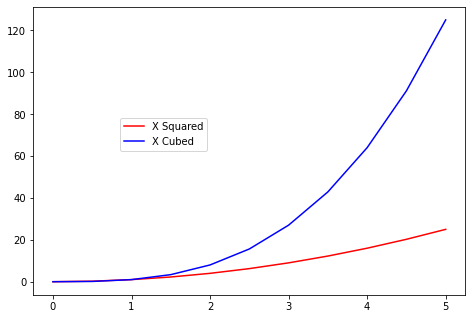

In [44]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2,'r',label='X Squared')
ax.plot(x,x**3,'b',label='X Cubed')

# ax.legend(loc=0)
ax.legend(loc=(0.2,0.5))

___
## PART 3

This final part covers the control over:

1. Plot Appearance
2. Axis Appearance
___

### 3.1. Plot Appearance

#### 3.1.1. Color for the plotted line/curve

Pass the `color=` argument in the plot function (string).
1. Use a predefined basic color name (e.g. orange, red, blue, etc.)
2. Use RGB hex code, begin with # (e.g. #111111, #FF8C00, etc.)

#### 3.1.2. Line Width

Pass the `linewidth=` or `lw=` argument in the plot function (float > 0)

#### 3.1.3. Opacity Level / Transparency

Pass the `alpha=` argument in the plot function (float, from 0 to 1)

#### 3.1.4. Line Style

Pass the `linestyle=` or `ls=` argument in the plot function (string, defined). See matplotlib documentation for style options.

#### 3.1.5. Plot Marker

Pass the `marker=` argument in the plot function (string type). See matplotlib documentation for style options.
<br><br>
Optional arguments:

- `markersize` defines marker size (float)
- `markerfacecolor` defines marker face color (string)
- `markeredgewidth` defines marker edge width (float)
- `markeredgecolor` defines marker edge color (string)

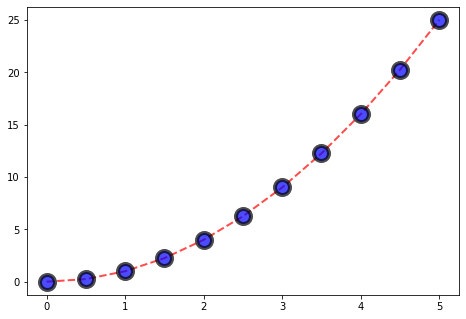

In [72]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

# ax.plot(t,dfs,color='red') # basic color
ax.plot(x,y,color='#FF0000',lw=2,alpha=0.7,ls='--',marker='o',markersize=15,
       markerfacecolor='blue',markeredgewidth=4,markeredgecolor='black')
# FF0000 is the RGB Hex code of red

#### 3.1.6. [EXTRA] MATLAB-ish Argument for Linestyle, Color, and Marker Style

In addition to those arguments above, we can also pass a simple string argument that is more commonly used by MATLAB user when plotting a simple figure. After passing the $x$ and $y$ data, simply pass a string containing linestyle, color initial, and marker $-$ all at once. 

For example, `'--ro'` gives a dashed linestyle `--`, red color `r`, and circle marker `o`. Then, we can also passed some arguments for the marker properties if needed.

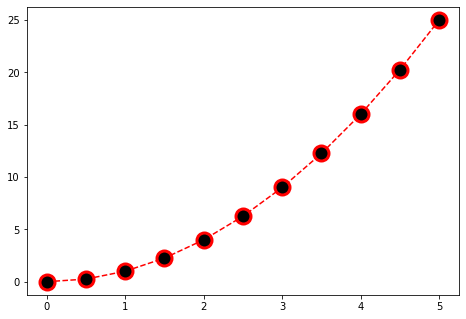

In [103]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x,y,'--ro',markersize=15,markerfacecolor='black',
        markeredgewidth=3,markeredgecolor='red')

___
### 3.2. Axis Appearance

Controlling axis sizing properties in a matplotlib figure. There are many controls we can use. See [matplotlib documentation here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html).

In this notebook, we take one of the most useful control: plot range

#### Plot Range

We can configure the ranges of axes using `set_ylim` (limit of y axis) and `set_xlim` (limit of x axis) methods in the axis object.

- `set_xlim([lowerbound,upperbound])`
- `set_ylim([lowerbound,upperbound])`

Alternatively, we can use `axis('tight')` to automatically get a *tightly-fitted* axes range.

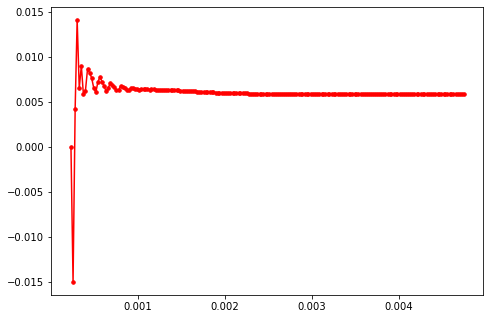

In [79]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(t,dfs,color='red',marker='.',markersize=7)

In the above figure, you can see that we use dot marker but it's rather difficult to observe.

Let's say we want to observe only on the certain part of figure on:
- x-axis at: $0 \le x \le 0.001$ and,
- zoom out the y-axis at: $-0.02 \le y \le 0.02$

(-0.02, 0.02)

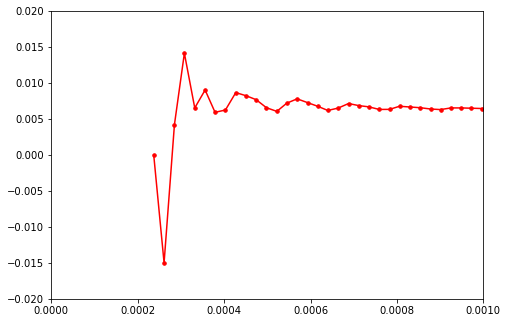

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t,dfs,color='red',marker='.',markersize=7)

ax.set_xlim([0,0.001])
ax.set_ylim([-0.02,0.02])

___
### 3.3. Special Plot Types

Just as in MATLAB, *matplotlib* has several plot types aside of *plot()*. Some example of the matplotlib specialized plots are:
- Scatter plot: `scatter()`
- Histogram: `hist()`
- Box plot: `boxplot()`
- Barplot: `bar()`
- *etc.*

___
#### 3.3.1. Scatter Plot

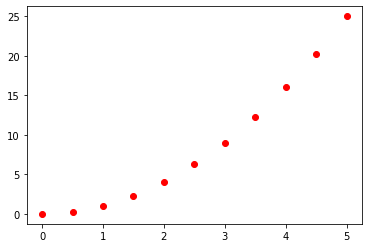

In [88]:
plt.scatter(x,y,color='red')

___
#### 3.3.2. Histogram

(array([10.,  8., 11., 12., 10.,  6., 10.,  9., 14., 10.]),
 array([ 15. , 110.8, 206.6, 302.4, 398.2, 494. , 589.8, 685.6, 781.4,
        877.2, 973. ]),
 <BarContainer object of 10 artists>)

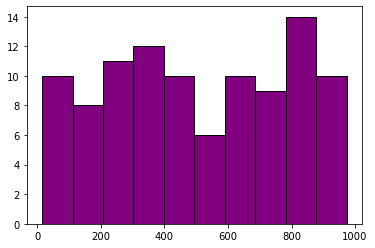

In [96]:
from random import sample
data = sample(range(1,1000), 100)

plt.hist(data,color='purple',edgecolor='black')

___
#### 3.3.3. Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x21b6b191708>,
 'caps': [<matplotlib.lines.Line2D at 0x21b69dfad88>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21b69e02388>,
 'medians': [<matplotlib.lines.Line2D at 0x21b69e67908>,
 'fliers': [<matplotlib.lines.Line2D at 0x21b69e62388>,
 'means': []}

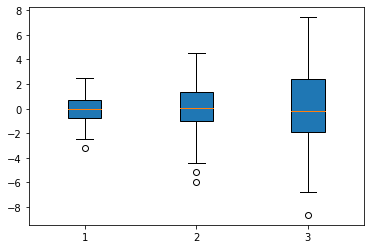

In [98]:
data = [np.random.normal(0, std, 100) for std in range(1,4)]

plt.boxplot(data,vert=True,patch_artist=True)

***Finished!***